In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import os
import sys
import scipy.stats
import matplotlib as mpl
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from compiler.ast import flatten
from sklearn.neighbors import NearestNeighbors
from itertools import groupby
import math
import networkx as nt
import gc
import psutil
import scipy.stats
#import Thestral
from scipy.stats.mstats import gmean

from scipy.stats import pearsonr
import community
import matplotlib.gridspec as gridspec
import random


In [81]:
import scipy

In [82]:

def Mkdir(DirX):
    if not os.path.exists(DirX):
        os.mkdir(DirX)

def Read(File):
    return pd.read_table(File,sep='\t',index_col=0)

def ReadBed(File):
    Bed=pd.read_table(File,sep='\t',index_col=None,header=None)
    Bed.index=Bed[3]
    return Bed

def Save(DF,File):
    DF.to_csv(File,sep='\t')

def SaveBed(Bed,File):
    Bed.to_csv(File,sep='\t',index=False,header=False)
    
def GetState(i):
    if 'Norm' in i: return 'Norm'
    if 'Arm' in i: return 'Arm'
    if 'Back' in i:return 'Back'
    
    
def ReadTable(Infile):return pd.read_table(Infile,sep='\t',index_col=0)

def Mkdir(DirX):
    if not os.path.exists(DirX):
        os.mkdir(DirX)

def meanCenter(L):
    m=np.mean(L)
    return [i-m for i in L]

def log10(L):return -math.log(L,10)

def p_adjust_bh(p):
    p = np.asfarray(p)
    by_descend = p.argsort()[::-1]
    by_orig = by_descend.argsort()
    steps = float(len(p)) / np.arange(len(p), 0, -1)
    q = np.minimum(1, np.minimum.accumulate(steps * p[by_descend]))
    return q[by_orig]

def ReadBed(BedFile):
    BedDF=pd.read_table(BedFile,sep='\t',header=None,index_col=None)
    BedDF.index=BedDF[3]
    return BedDF

def SaveTable(DF,FileName):DF.to_csv(FileName,sep='\t')
def SaveBed(BedDF,FileName):BedDF.to_csv(FileName,sep='\t',index=False,header=False)

    


In [ ]:
#input Files
CountF='./OutPut/AllSamples_NormSScCommon/PeakCount.QNorm_Normalized.log2.txt'                  
BedF='./SourceData/NormSScPeaks.bed'
outDir='./OutPut/NetWork'
Mkdir(outDir)
BedDF=ReadBed(BedF)
CountDF=ReadTable(CountF)


In [85]:

def GetFDC(ct):
    NormA=CountDF[[i for i in list(CountDF) if 'Norm' in i and ct in i]]
    AffectedA=CountDF[[i for i in list(CountDF) if 'Arm' in i and ct in i]]
    return AffectedA.apply(np.mean,axis=1)-NormA.apply(np.mean,axis=1)



In [86]:
FDC_df=pd.DataFrame({}, index=CountDF.index)
FDC_df['CD4']=GetFDC('CD4')
FDC_df['CD8']=GetFDC('CD8')
FDC_df['Fib']=GetFDC('Fib')
FDC_df['DC']=GetFDC('DC')



In [11]:
##1.
#Recepter-Ligand

RLDF1=open('./SourceData/Receptor-Ligand/DLRP.All_LigandRecepter_Interaction.txt').readlines()
RLDF2=pd.read_table('./SourceData/Receptor-Ligand/interactions_cellphonedb.csv',sep=',',index_col=0)[['entry_name_a','entry_name_b']].dropna(axis=0,how='any')             


A=[i.split('_')[0] for i in RLDF2['entry_name_a']]
B=[i.split('_')[0] for i in RLDF2['entry_name_b']]
RLList=list(set(A+B))
RL=[A[i]+'-'+B[i] for i in range(len(A))]

l=1
for line in RLDF1:
    if line[0]=='#':continue
    if line=='\n':
        l=1
        continue
    if l:
        Gene1=line.split('\t')[1]
        if Gene1 not in RLList:
            print Gene1
            RLList.append(Gene1)
        l=0
    else:
        Gene2=line.split('\t')[1]
        if Gene2 not in RLList:
            RLList.append(Gene2)
            print Gene2
        if (Gene1+'-'+Gene2 not in RL) and (Gene2+'-'+Gene1 not in RL): 
            RL.append(Gene1+'-'+Gene2)
            print Gene1+'-'+Gene2
            
            

TNF
TNFRSF1A
TNF-TNFRSF1A
TNFRSF1B
TNF-TNFRSF1B
LTBR
TNF-LTBR
TNFSF7
TNFRSF7
TNFSF7-TNFRSF7
LTA
LTA-TNFRSF1A
LTA-TNFRSF1B
TNFRSF14
LTA-TNFRSF14
LTA-LTBR
TNFSF8
TNFRSF8
TNFSF8-TNFRSF8
LTB
LTB-LTBR
TNFSF5
TNFRSF5
TNFSF5-TNFRSF5
TNFSF6
TNFRSF6
TNFSF6-TNFRSF6
TNFRSF6B
TNFSF6-TNFRSF6B
TNFSF13
TNFSF10
TNFRSF10A
TNFSF10-TNFRSF10A
TNFRSF10B
TNFSF10-TNFRSF10B
TNFRSF10C
TNFSF10-TNFRSF10C
TNFRSF10D
TNFSF10-TNFRSF10D
TNFRSF11B
TNFSF10-TNFRSF11B
TNFSF11
TNFRSF11A
TNFSF11-TNFRSF11A
TNFSF11-TNFRSF11B
TNFSF9
TNFRSF9
TNFSF9-TNFRSF9
TNFSF4
TNFRSF4
TNFSF4-TNFRSF4
TNFSF14
TNFSF14-TNFRSF14
TNFSF14-TNFRSF6B
TNFSF14-LTBR
TNFSF12
TNFRSF12
TNFSF12-TNFRSF12
TNFSF18
TNFRSF18
TNFSF18-TNFRSF18
IL2
IL2RA
IL2-IL2RA
IL2RB
IL2-IL2RB
IL2RG
IL2-IL2RG
IL7
IL7R
IL7-IL7R
IL7-IL2RG
IL9
IL9R
IL9-IL9R
IL9-IL2RG
IL15RA
IL15-IL15RA
IL15-IL2RB
IL15-IL2RG
IL4
IL4R
IL4-IL4R
IL4-IL2RG
IL13RA1
IL4-IL13RA1
IL13-IL13RA1
IL13RA2
IL13-IL13RA2
IL13-IL4R
IL13-IL2RG
IL3
IL3RA
IL3-IL3RA
CSF2RB
IL3-CSF2RB
IL5
IL5RA
IL5-IL5RA
IL5-CSF2RB
CSF2


# Homer annotation Peaks

In [87]:
#Peak to Genes
AnoDF=pd.DataFrame(ReadTable('./OutPut/AllSamples_NormSScCommon/NormSScPeaks.bed.ano.txt')['Gene Name'])
RLList_st=[]
Count_df=[]

for i in RLList:
    if i in list(AnoDF['Gene Name']):
        RLList_st.append(i)
        Count_df.append(list(CountDF.loc[list(AnoDF[AnoDF['Gene Name']==i].index)].apply(sum,axis=0)))
Count_df=pd.DataFrame(Count_df,index=RLList_st,columns=list(CountDF))        
                


In [88]:
##3
#Arm-Norm FoldChange
def FoldChange(RL_df):
    CellType=['CD4','CD8','DC','Fib']
    FDC_df=pd.DataFrame({},index=RL_df.index)
    Header=list(RL_df)
    for ct in CellType:
        Norm=[i for i in Header if (ct in i) and ('Norm' in i)]
        Arm=[i for i in Header if (ct in i) and ('Arm' in i)]
        MNorm=RL_df[Norm].apply(np.mean,axis=1)
        MArm=RL_df[Arm].apply(np.mean,axis=1)
        L=[]
        for i in range(len(MArm)):
#             if max(MArm[i],MNorm[i])<tho:
#                 L.append(0)
#             else:
            L.append(MArm[i]-MNorm[i])
        FDC_df[ct]=L
    return FDC_df
#Remove genes with low signal
Count_DF=Count_df[Count_df.apply(max,axis=1)>10]
FDC_df=FoldChange(Count_DF)
FDC_df_Final=FDC_df[FDC_df.apply(max,axis=1)>0]
FDC_df_NormH=(-FDC_df)[(-FDC_df).apply(max,axis=1)>0]



In [89]:
'CCR7' in FDC_df_NormH.index

False

In [90]:
FDC_df_NormH.loc['CCR7']=[0,0,0,0]
outDir=os.path.join(outDir,'Max.10')
Mkdir(outDir)


In [91]:
##4
#Find Recepter-Ligand interaction
def FindRLpair(RL):
    RLState=[]  
    S=list(FDC_df_Final.index)
    for rl in RL:
        P=rl.split('-')
        if (P[0] in S) and (P[1] in S):
            RLState.append(rl)
    return RLState
RLStay=FindRLpair(RL)


In [92]:
len(RLStay)

263

In [93]:
##5
#Get the interraction score
def Muxp(a,b):
    if (a<0) and (b<0):
        return min([a,b])
    elif max(a,b)<1:
        return 0
    else:
        return a+b



In [94]:
##6
##Display the Recepter-Ligand（CD4-CD8,CD4-DC,CD4-Fib,CD8-DC,CD8-Fib,DC-Fib）
def GetRLCellTypepair(FDC_df_Final,x):
    RLCellTypes_df=pd.DataFrame({})
    RLCellTypesCount_df=pd.DataFrame({})
    
    CellType=['CD4','CD8','DC','Fib']
    J=[]
    for i1 in range(len(CellType)-1):
        for i2 in range(i1+1,len(CellType)):
            ct1=CellType[i1]
            ct2=CellType[i2]
            CT1=FDC_df_Final[ct1]
            CT2=FDC_df_Final[ct2]
            S=[]
            C=[]
            RLFinal=[]
            for rl in RLStay:
                try:
                    rl1,rl2=rl.split('-')
                    count=max(Muxp(CT1[rl2],CT2[rl1]),Muxp(CT1[rl1],CT2[rl2]))
                    J.append(count)
                    if count>x:
                        S.append(1)
                        C.append(count)
                    else:
                        S.append(0)
                        C.append(0)
                    RLFinal.append(rl)
                except KeyError:
                    continue
            RLCellTypes_df[ct1+'-'+ct2]=S
            RLCellTypesCount_df[ct1+'-'+ct2]=C
    RLCellTypes_df.index=RLFinal
    RLCellTypesCount_df.index=RLFinal
    RLCellTypes_df=RLCellTypes_df[RLCellTypes_df.apply(sum,axis=1)>1]
    RLCellTypesCount_df=RLCellTypesCount_df.loc[RLCellTypes_df.index]
    return RLCellTypes_df,RLCellTypesCount_df
RLCellTypes_df,RLCellTypesCount_df=GetRLCellTypepair(FDC_df_Final,7)     #more than 7

Norm_RLCellTypes_df,Norm_RLCellTypesCount_df=GetRLCellTypepair(FDC_df_NormH,7)  


In [95]:
myCmap=sns.light_palette("#CA4641",as_cmap=True)


In [97]:
AllRL=list(set(list(RLCellTypesCount_df.index)+list(Norm_RLCellTypesCount_df.index)))

def Muxp2(a,b):
    if a*b<0:
        return 0
    elif max(abs(a),abs(b))<1:
        return 0
    else:
        return a+b


def GetRLCellTypepair2(FDC_df_Final,x):
    RLCellTypes_df=pd.DataFrame({})
    RLCellTypesCount_df=pd.DataFrame({})
    
    CellType=['CD4','CD8','DC','Fib']
   
    
    for i1 in range(len(CellType)-1):
        for i2 in range(i1+1,len(CellType)):
            ct1=CellType[i1]
            ct2=CellType[i2]
            CT1=FDC_df_Final[ct1]
            CT2=FDC_df_Final[ct2]
            S=[]
            C=[]
            RLFinal=[]
            for rl in AllRL:
                try:
                    rl1,rl2=rl.split('-')
                    A=Muxp2(CT1[rl2],CT2[rl1])
                    B=Muxp2(CT1[rl1],CT2[rl2])
                    if abs(A)>abs(B):
                        count=A
                    elif abs(B)>abs(A):
                        count=B
                    else:
                        count=0
                    if count>x:
                        S.append(1)
                        C.append(count)
                    elif count<-x:
                        S.append(-1)
                        C.append(count)                           
                    else:
                        S.append(0)
                        C.append(0)
                    RLFinal.append(rl)
                except KeyError:
                    continue
            RLCellTypes_df[ct1+'-'+ct2]=S
            RLCellTypesCount_df[ct1+'-'+ct2]=C
    RLCellTypes_df.index=RLFinal
    RLCellTypesCount_df.index=RLFinal
    RLCellTypes_df=RLCellTypes_df[abs(RLCellTypes_df).apply(sum,axis=1)>1]
    RLCellTypesCount_df=RLCellTypesCount_df.loc[RLCellTypes_df.index]
    return RLCellTypes_df,RLCellTypesCount_df    

AllRLCellTypes_df,AllRLCellTypesCount_df = GetRLCellTypepair2(FDC_df_Final,7)



In [98]:
SSCup_RowSum=AllRLCellTypes_df[AllRLCellTypes_df>0].fillna(0).apply(sum,axis=1)
Normup_RowSum=AllRLCellTypes_df[AllRLCellTypes_df<0].fillna(0).apply(sum,axis=1)

AllRLCellTypesCount_df=AllRLCellTypesCount_df[['CD8-Fib','CD8-DC','CD4-CD8','CD4-Fib','DC-Fib','CD4-DC']]
RLOrder=list(AllRLCellTypes_df.apply(sum,axis=1).sort_values().index)
AllRLCellTypesCount_df=AllRLCellTypesCount_df.loc[RLOrder]


SSCup_ColSum=AllRLCellTypes_df[AllRLCellTypes_df>0].fillna(0).apply(sum,axis=0)[['CD8-Fib','CD8-DC','CD4-CD8','CD4-Fib','DC-Fib','CD4-DC']]
Normup_ColSum=abs(AllRLCellTypes_df[AllRLCellTypes_df<0].fillna(0).apply(sum,axis=0)[['CD8-Fib','CD8-DC','CD4-CD8','CD4-Fib','DC-Fib','CD4-DC']]) 



In [99]:
Normup_ColSum

CD8-Fib    42.0
CD8-DC     25.0
CD4-CD8    20.0
CD4-Fib    12.0
DC-Fib      9.0
CD4-DC      0.0
dtype: float64

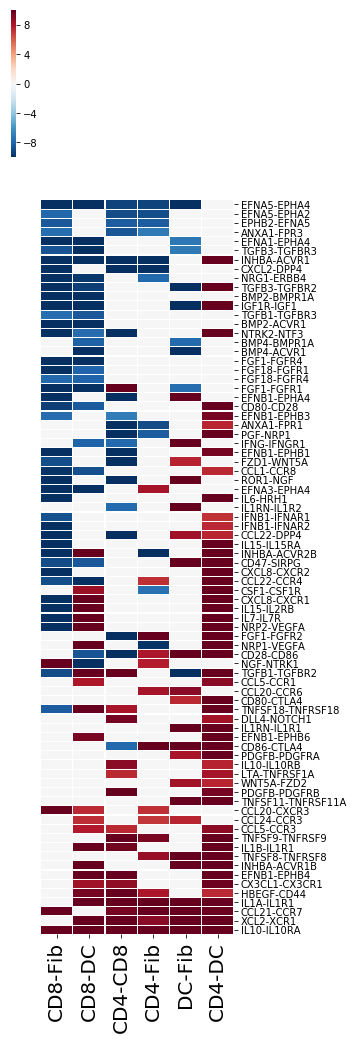

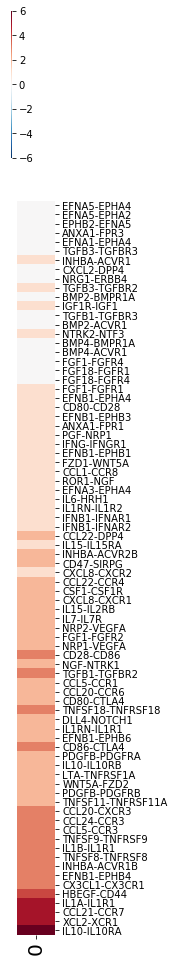

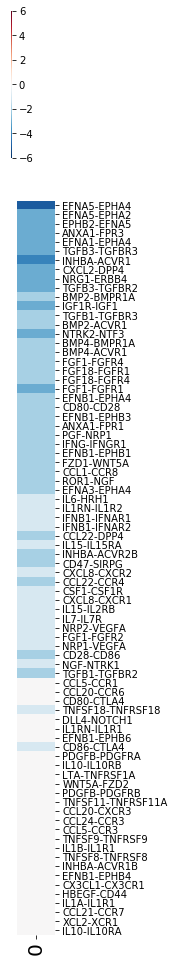

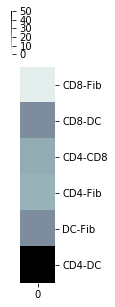

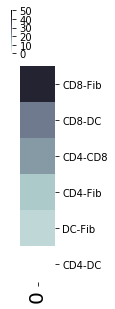

In [100]:

#Save All Recepter
fig1=sns.clustermap(AllRLCellTypesCount_df,figsize=(4,17),cmap='RdBu_r',row_cluster=False,col_cluster=False,vmin=-10,vmax=10,yticklabels=AllRLCellTypesCount_df.index,linewidths=0.1,linecolor='w')
plt.setp(fig1.ax_heatmap.get_yticklabels(), rotation=0,fontsize=10)
plt.setp(fig1.ax_heatmap.get_xticklabels(), rotation=90,fontsize=20)
fig1.savefig(os.path.join(outDir,'AllUp_RLCellTypes_df.Cluster.Count.pdf'))
plt.show()
Save(AllRLCellTypes_df,os.path.join(outDir,'AllUp_RLCellTypes_df.Cluster.Count.txt'))


#RLOrder=[AllRLCellTypesCount_df.index[i] for i in fig1.dendrogram_row.reordered_ind]
SSc_RowSumOrder=SSCup_RowSum.loc[RLOrder]
Norm_RowSumOrder=Normup_RowSum.loc[RLOrder]

fig2=sns.clustermap(SSc_RowSumOrder,figsize=(0.8,17),cmap='RdBu_r',vmin=-6,vmax=6,yticklabels=SSc_RowSumOrder.index,row_cluster=False,col_cluster=False)
plt.setp(fig2.ax_heatmap.get_yticklabels(), rotation=0,fontsize=10)
plt.setp(fig2.ax_heatmap.get_xticklabels(), rotation=90,fontsize=20)
plt.show()
fig2.savefig(os.path.join(outDir,'AllUp.SSc_RLCellTypes_df.sorted_byCount.sumRow.pdf'))


fig3=sns.clustermap(Norm_RowSumOrder,figsize=(0.8,17),cmap='RdBu_r',vmin=-6,vmax=6,yticklabels=Norm_RowSumOrder.index,row_cluster=False,col_cluster=False)
plt.setp(fig3.ax_heatmap.get_yticklabels(), rotation=0,fontsize=10)
plt.setp(fig3.ax_heatmap.get_xticklabels(), rotation=90,fontsize=20)
plt.show()
fig3.savefig(os.path.join(outDir,'AllUp.Norm_RLCellTypes_df.sorted_byCount.sumRow.pdf'))



fig2=sns.clustermap(SSCup_ColSum,figsize=(0.8,5),cmap='bone_r',vmin=0,vmax=50,row_cluster=False,col_cluster=False)
plt.setp(fig3.ax_heatmap.get_yticklabels(), rotation=0,fontsize=10)
plt.setp(fig3.ax_heatmap.get_xticklabels(), rotation=90,fontsize=20)
plt.show()
fig2.savefig(os.path.join(outDir,'AllUp.SSc_RLCellTypes_df.sorted_byCount.sumCol.pdf'))


fig3=sns.clustermap(Normup_ColSum,figsize=(0.8,5),cmap='bone_r',vmin=0,vmax=50,row_cluster=False,col_cluster=False)
plt.setp(fig3.ax_heatmap.get_yticklabels(), rotation=0,fontsize=10)
plt.setp(fig3.ax_heatmap.get_xticklabels(), rotation=90,fontsize=20)
plt.show()
fig3.savefig(os.path.join(outDir,'AllUp.Norm_RLCellTypes_df.sorted_byCount.sumCol.pdf'))





In [106]:
SSCup_ColSum

CD8-Fib     4.0
CD8-DC     22.0
CD4-CD8    17.0
CD4-Fib    16.0
DC-Fib     22.0
CD4-DC     53.0
dtype: float64

# Interaction Network


####up regulated（+，+），SSc down regulated（-，-）


In [103]:


def FindRecepterLigand(FDC_df_Final,AllRL,Celltype,outDir,The=7,Thes=1):
    Dir=os.path.join(outDir,'Circus_plot_NormSSc')
    Mkdir(Dir)
    AllIndex=AllRL+[i.split('-')[1]+'-'+i.split('-')[0] for i in AllRL]
    AllCelltype=[Celltype]+[i for i in list(FDC_df_Final) if i!=Celltype]
    NetWorkDF=pd.DataFrame({},index=AllIndex,columns=AllCelltype)
    A=[i.split('-')[0] for i in AllIndex]
    B=[i.split('-')[1] for i in AllIndex]
    NetWorkDF[Celltype]=list(FDC_df_Final.loc[A][Celltype])
    for c in AllCelltype[1:]:
        NetWorkDF[c]=list(FDC_df_Final.loc[B][c])
    def FindFromTo(rl):
        r,l=rl.split('-')
        L=NetWorkDF.loc[rl]
        a=L[0]
        if abs(a)<Thes:
            return [0,0,0,0]
        elif a<0:
            O=[]
            for i in L[1:]:
                if i>-Thes:
                    O.append(0)
                elif a+i<-The:
                    O.append('-'+l)
                else:
                    O.append(0)
            if O==[0,0,0]:
                return [0]+O
            else:
                return ['-'+r]+O
        elif a>0:
            O=[]
            for i in L[1:]:
                if i<Thes:
                    O.append(0)
                elif a+i>The:
                    O.append('+'+l)
                else:
                    O.append(0)
            if O==[0,0,0]:
                return [0]+O
            else:
                return ['+'+r]+O  
    for rl in AllIndex:
        L=FindFromTo(rl)
        if L!=[0,0,0,0]:
            NetWorkDF.loc[rl]=L
        else:
            NetWorkDF=NetWorkDF.drop([rl],axis=0)
    SaveTable(NetWorkDF,os.path.join(Dir,Celltype+'_Network.txt'))
    return NetWorkDF,os.path.join(Dir,Celltype+'_Network.txt')
            
    

In [104]:

AllRL=list(AllRLCellTypesCount_df.index)
DC_NetWorkDF,DC_NetWorkFile=FindRecepterLigand(FDC_df_Final,AllRL,'DC',outDir,The=7,Thes=1)
CD4_NetWorkDF,CD4_NetWorkFile=FindRecepterLigand(FDC_df_Final,AllRL,'CD4',outDir,The=7,Thes=1)
CD8_NetWorkDF,CD8_NetWorkFile=FindRecepterLigand(FDC_df_Final,AllRL,'CD8',outDir,The=7,Thes=1)
Fib_NetWorkDF,Fib_NetWorkFile=FindRecepterLigand(FDC_df_Final,AllRL,'Fib',outDir,The=7,Thes=1)



In [44]:
#Draw CircusPlot
for File in [DC_NetWorkFile,CD4_NetWorkFile,CD8_NetWorkFile,Fib_NetWorkFile]:
    print File
    os.system('/usr/local/bin/Rscript ./Code/SSC_CircusPlot_ForOneCelltype.NormSSc.R {}'.format(File))



/Users/liuqian/Documents/A_SSC_project/NetWork2/Max.10/Circus_plot_NormSSc/DC_Network.txt
/Users/liuqian/Documents/A_SSC_project/NetWork2/Max.10/Circus_plot_NormSSc/CD4_Network.txt
/Users/liuqian/Documents/A_SSC_project/NetWork2/Max.10/Circus_plot_NormSSc/CD8_Network.txt
/Users/liuqian/Documents/A_SSC_project/NetWork2/Max.10/Circus_plot_NormSSc/Fib_Network.txt


In [105]:
##Replace -/+ to down/up
def Replace(File):
    FileDF=ReadTable(File)
    for H in list(FileDF):
        FileDF[H]=[i.replace('-','Down_').replace('+','Up_') for i in list(FileDF[H])]
    SaveTable(FileDF,File+'Replace.txt')
    
for File in [DC_NetWorkFile,CD4_NetWorkFile,CD8_NetWorkFile,Fib_NetWorkFile]:
    print File
    Replace(File)







/Users/liuqian/Documents/A_SSC_project/NetWork2/Max.10/Circus_plot_NormSSc/DC_Network.txt
/Users/liuqian/Documents/A_SSC_project/NetWork2/Max.10/Circus_plot_NormSSc/CD4_Network.txt
/Users/liuqian/Documents/A_SSC_project/NetWork2/Max.10/Circus_plot_NormSSc/CD8_Network.txt
/Users/liuqian/Documents/A_SSC_project/NetWork2/Max.10/Circus_plot_NormSSc/Fib_Network.txt


# 8
##下面的Code用于输出给定的一个细胞类型间和其他的细胞类型间相互最优Recepter-Ligand

In [21]:
##8
##下面的Code用于输出给定的一个细胞类型间和其他的细胞类型间相互最优Recepter-Ligand
def FindFromTo(FDC_df_Final,AllRL,Celltype,x=0.2,tho=0.5):
    Index=AllRL+[i.split('-')[1]+'-'+i.split('-')[0] for i in AllRL]
    DF=pd.DataFrame({},index=Index)
    From=[i.split('-')[0] for i in Index]
    To=[i.split('-')[1] for i in Index]
    A=Celltype
    Bs=[i for i in list(FDC_df_Final) if i!=A]
    DF[A]=list(FDC_df_Final.loc[From][A])
    for ct in Bs:
        DF[ct]=list(FDC_df_Final.loc[To][ct])

    for rl in list(DF.index):
        f=rl.split('-')[0]
        t=rl.split('-')[1]
        D=list(DF.loc[rl])
        Judge=[Muxp(D[0],D[1]),Muxp(D[0],D[2]),Muxp(D[0],D[3])]
        if (max(Judge)<x) or (max(D)<tho):
            Dn=[0,0,0,0]
        else:   
            if D[0]>0.95:
                Dn=['+'+f]
            else:
                Dn=[f]
            for d in D[1:]:
                if (Muxp(D[0],d)>x):
                    if d>0.95:
                        Dn.append('+'+t)
                    else:
                        Dn.append(t)
                else:
                    Dn.append(0)
        DF.loc[rl]=Dn
    #去除都是0的列
    def judgeZero(L):return [i==0 for i in L]
    DFjudge=DF.apply(judgeZero,axis=1).apply(sum,axis=1)<4
    Dir=os.path.join(outDir,'Circus_plot_'+str(x))
    Mkdir(Dir)
    Save(DF[DFjudge],os.path.join(Dir,'NetWork_'+Celltype+'.txt')  ) 
    return DF[DFjudge],os.path.join(Dir,'NetWork_'+Celltype+'.txt')   
    

In [25]:
AllRL=list(RLCellTypes_df.index)
DC_df,DC_file=FindFromTo(FDC_df_Final,AllRL,'DC',10,5)  
CD4_df,CD4_file=FindFromTo(FDC_df_Final,AllRL,'CD4',10,5)      
CD8_df,CD8_file=FindFromTo(FDC_df_Final,AllRL,'CD8',10,5)     
Fib_df,Fib_file=FindFromTo(FDC_df_Final,AllRL,'Fib',10,5)     

AllRL=list(Norm_RLCellTypes_df.index)
Norm_DC_df,Norm_DC_file=FindFromTo(FDC_df_NormH,AllRL,'DC',10,5)  
Norm_CD4_df,Norm_CD4_file=FindFromTo(FDC_df_NormH,AllRL,'CD4',10,5)      
Norm_CD8_df,Norm_CD8_file=FindFromTo(FDC_df_NormH,AllRL,'CD8',10,5)     
Norm_Fib_df,Norm_Fib_file=FindFromTo(FDC_df_NormH,AllRL,'Fib',10,5)     



In [286]:
#进入以上每个文件将文件第一行开头的制表符去掉
for File in [DC_file,CD4_file,CD8_file,Fib_file]:
    print File
    os.system('/usr/local/bin/Rscript /Users/liuqian/Documents/A_SSC_project/NetWork2/SSC_CircusPlot_ForOneCelltype.R {}'.format(File))



/Users/liuqian/Documents/A_SSC_project/NetWork2/Max.10/Circus_plot_10/NetWork_DC.txt
/Users/liuqian/Documents/A_SSC_project/NetWork2/Max.10/Circus_plot_10/NetWork_CD4.txt
/Users/liuqian/Documents/A_SSC_project/NetWork2/Max.10/Circus_plot_10/NetWork_CD8.txt
/Users/liuqian/Documents/A_SSC_project/NetWork2/Max.10/Circus_plot_10/NetWork_Fib.txt


In [26]:
for File in [Norm_DC_file,Norm_CD4_file,Norm_CD8_file,Norm_Fib_file]:
    print File
    os.system('/usr/local/bin/Rscript /Users/liuqian/Documents/A_SSC_project/NetWork2/SSC_CircusPlot_ForOneCelltype.R {}'.format(File))



/Users/liuqian/Documents/A_SSC_project/NetWork2/Max.10/Circus_plot_10/NetWork_DC.txt
/Users/liuqian/Documents/A_SSC_project/NetWork2/Max.10/Circus_plot_10/NetWork_CD4.txt
/Users/liuqian/Documents/A_SSC_project/NetWork2/Max.10/Circus_plot_10/NetWork_CD8.txt
/Users/liuqian/Documents/A_SSC_project/NetWork2/Max.10/Circus_plot_10/NetWork_Fib.txt
